In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df=pd.read_csv('/content/train_loan_preprocess.csv')

In [189]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [190]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [191]:
#to get numerical summary
def get_numerical_sumary(df):
  total_rows=df.shape[0]
  missing_col=[col for col in df.columns if df[col].isnull().sum()>0]
  missing_percent={}

  for col in missing_col:
    null_count=df[col].isnull().sum()
    per=(null_count/total_rows)*100
    missing_percent[col]=per
    print(f'{col}:{null_count},({round(per,3)})')
  return missing_percent

In [192]:
miss_per=get_numerical_sumary(df)

Gender:13,(2.117)
Married:3,(0.489)
Dependents:15,(2.443)
Self_Employed:32,(5.212)
LoanAmount:22,(3.583)
Loan_Amount_Term:14,(2.28)
Credit_History:50,(8.143)


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Finding and handling missing values

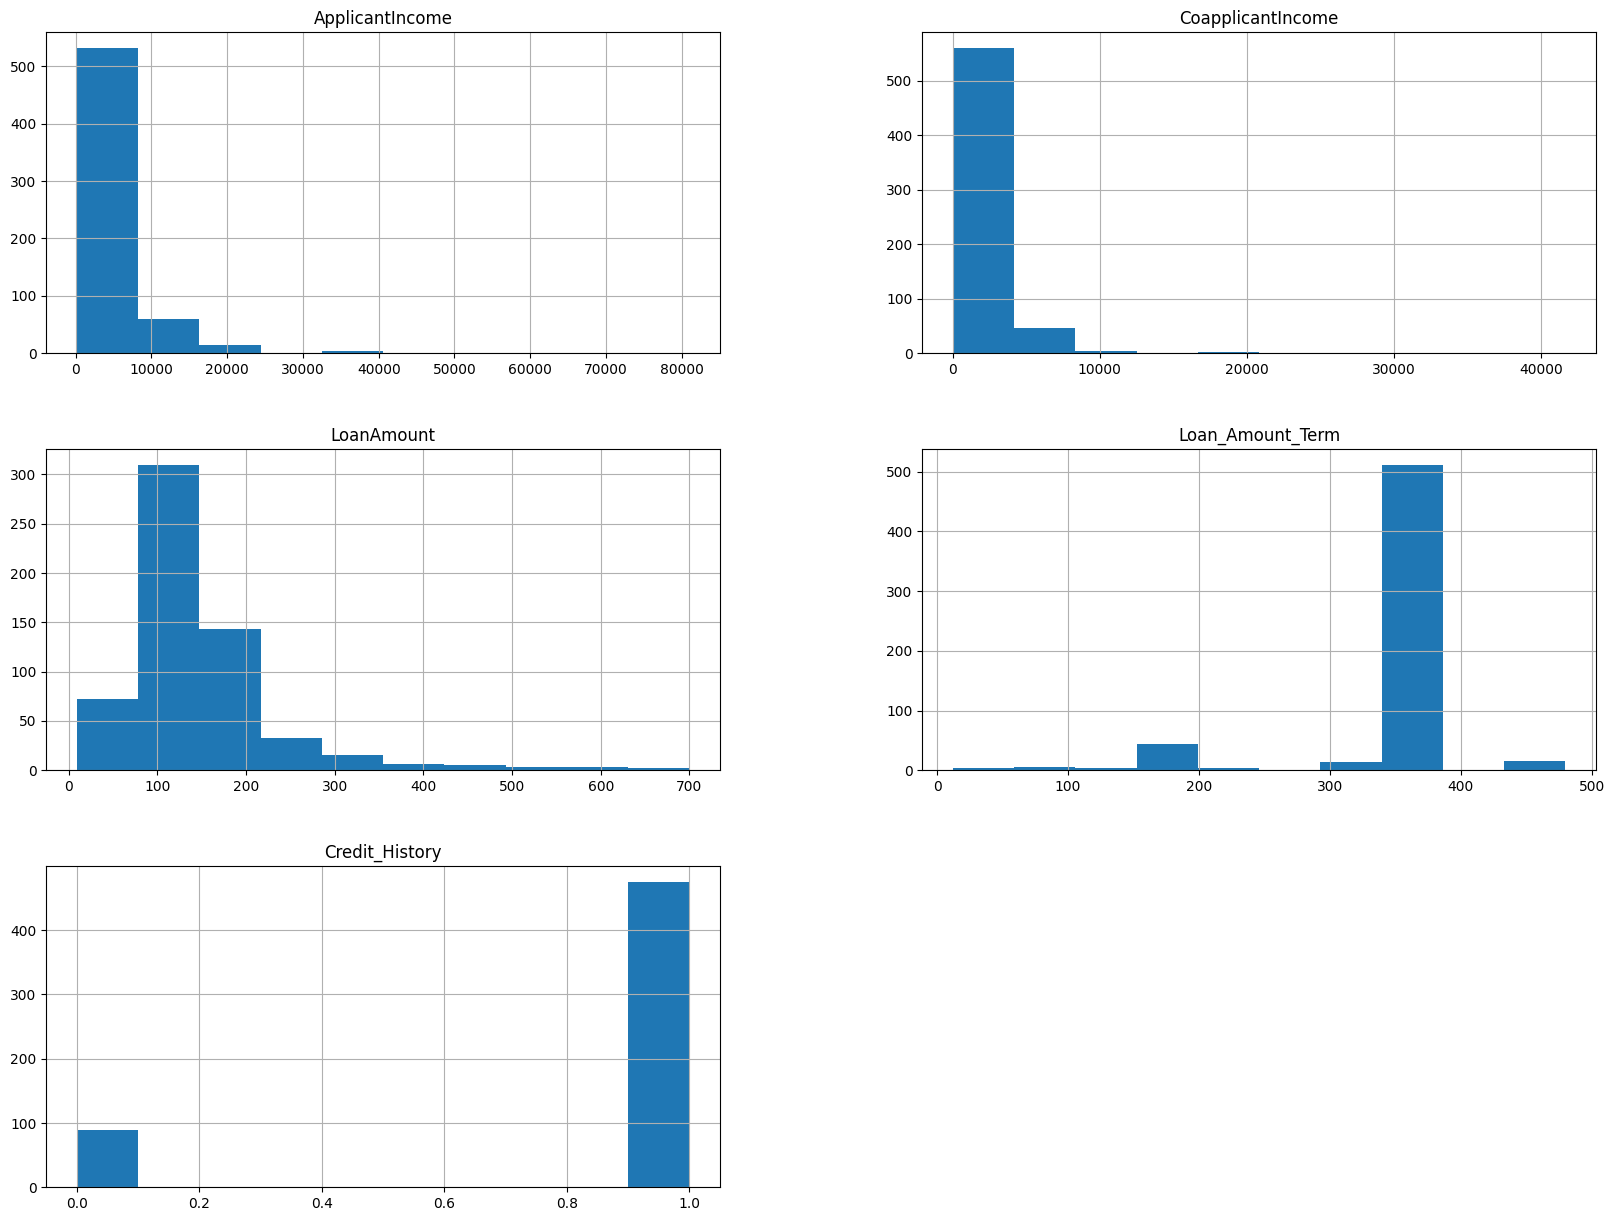

In [194]:
freqgrph=df.select_dtypes(include=['float','int'])
freqgrph.hist(figsize=(20,15))
plt.show()

In [195]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [196]:
for i in ['LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
       df[i]=df[i].fillna(df[i].median())

In [197]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [198]:
for i in ['Gender',
       'Married', 'Dependents','Self_Employed']:
       df[i]=df[i].fillna(df[i].mode()[0])

In [199]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


outlier finding using boxplot method

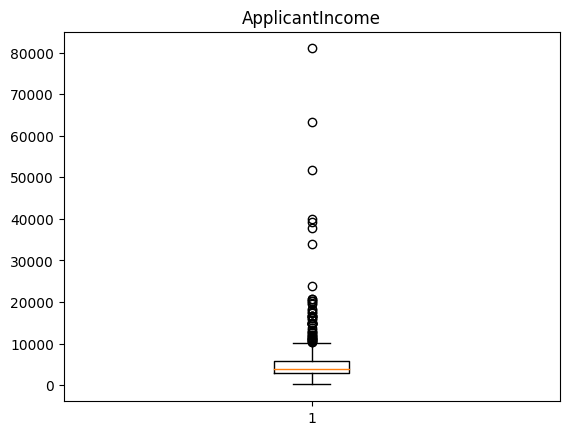

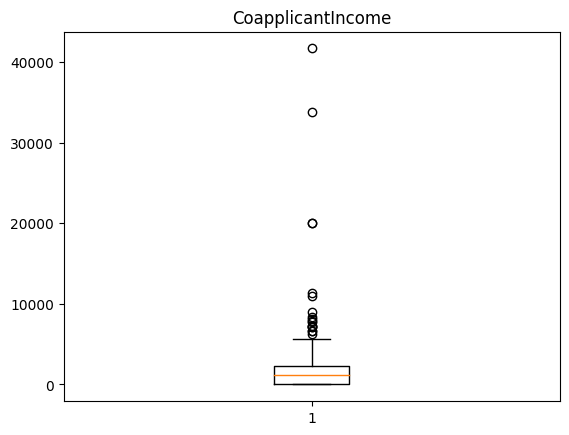

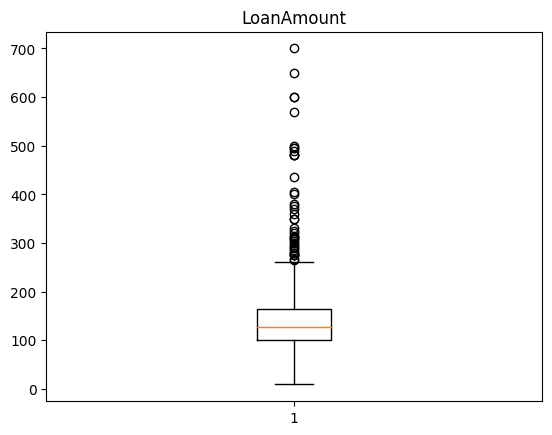

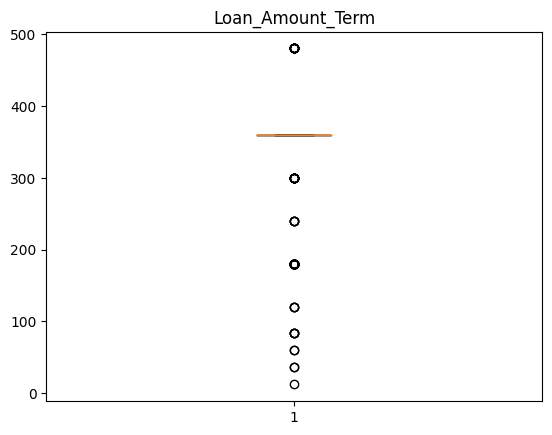

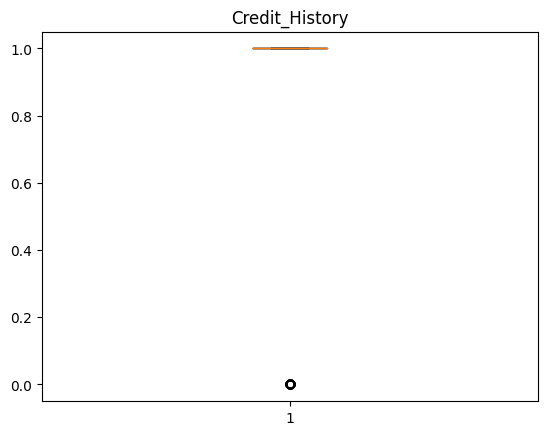

In [200]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
       plt.figure()
       plt.boxplot(df[i])
       plt.title(i)

outlier finding using IQR method

In [201]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
  Q1=df[i].quantile(0.25)
  Q2=df[i].quantile(0.50)
  Q3=df[i].quantile(0.75)
  iqr=Q3-Q1
  lower=Q1-(1.5*iqr)
  upper=Q3+(1.5*iqr)
  print(f'{i}:Q1 {Q1},Q2 {Q2},Q3 {Q3},iqr {iqr},lower {lower},upper {upper}\n')
  print(df[(df[i]<lower) | (df[i]>upper)].index)#to get the index of qutliers


ApplicantIncome:Q1 2877.5,Q2 3812.5,Q3 5795.0,iqr 2917.5,lower -1498.75,upper 10171.25

Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144, 146,
       155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308, 324, 333,
       369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483, 487, 493, 506,
       509, 525, 533, 534, 561, 572, 594, 604],
      dtype='int64')
CoapplicantIncome:Q1 0.0,Q2 1188.5,Q3 2297.25,iqr 2297.25,lower -3445.875,upper 5743.125

Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 506,
       513, 523, 581, 600],
      dtype='int64')
LoanAmount:Q1 100.25,Q2 128.0,Q3 164.75,iqr 64.5,lower 3.5,upper 261.5

Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171, 177,
       233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372, 381, 391,
       409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592, 600, 604],
      dtype='int64')
Loan_Amount_Term:Q1 360.0,Q2 360.0,Q3 360.0,iqr 0.0,lower 360.0,upper 360.0


Outlier finding using Z score

In [202]:
from scipy import stats
import numpy as np
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
  z_scores = np.abs(stats.zscore(df[i]))
  threshold = 3
  outliers = np.where(z_scores > threshold)
  print(f"Outliers found at: {outliers}")

Outliers found at: (array([126, 155, 171, 183, 185, 333, 409, 443]),)
Outliers found at: (array([  9, 177, 402, 417, 581, 600]),)
Outliers found at: (array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604]),)
Outliers found at: (array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585]),)
Outliers found at: (array([], dtype=int64),)


Capping/Flooring Outliers

Capping: Setting a maximum threshold (upper limit) for the values in the dataset. Any value above this threshold is replaced with the threshold value.

Flooring: Setting a minimum threshold (lower limit) for the values in the dataset. Any value below this threshold is replaced with the threshold value.

In [203]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       ]:
 # Cap at 85th percentile and floor at 5th percentile
 cap_value = df[i].quantile(0.85)
 floor_value = df[i].quantile(0.05)
 df[i] = np.where(df[i] > cap_value, cap_value, df[i])
 df[i] = np.where(df[i] < floor_value, floor_value, df[i])


In [204]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History']:
   z_scores = np.abs(stats.zscore(df[i]))
   threshold = 3
   outliers = np.where(z_scores > threshold)
   print(f"Outliers found at: {outliers}")

Outliers found at: (array([], dtype=int64),)
Outliers found at: (array([], dtype=int64),)
Outliers found at: (array([], dtype=int64),)
Outliers found at: (array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585]),)
Outliers found at: (array([], dtype=int64),)


Encoding

In [216]:
for i in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed','Property_Area', 'Loan_Status']:
  print(f'{i} : {df[i].nunique()}')

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
Property_Area : 3
Loan_Status : 2


In [223]:
df1=df.copy()

In [224]:
df1.drop('Loan_ID',axis=1,inplace=True)#Since all the values in the col is unique then there will be no impact in ml model.

In [225]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [226]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed','Property_Area', 'Loan_Status']:
  df1[i]=le.fit_transform(df1[i])
  df1[i]=le.fit_transform(df1[i])

In [227]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [228]:
df1.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

Feature Scaling

In [229]:
#splitting dataset into features and targets
x=df1.drop('Loan_Status',axis=1)
y=df1['Loan_Status']

In [230]:
#applying min mxa scaling on numerical cols
x1=x.copy()
x1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [231]:
x1.drop( ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],axis=1,inplace=True)

In [232]:
x1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [233]:
#doing min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1=scaler.fit_transform(x1)

In [234]:
#we have to convert this array into dataframe
x1=pd.DataFrame(x1,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])
x1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.695592,0.000000,0.540520,0.74359,1.0
1,0.472732,0.493835,0.540520,0.74359,1.0
2,0.194069,0.000000,0.066514,0.74359,1.0
3,0.120663,0.772191,0.479358,0.74359,1.0
4,0.722173,0.000000,0.639908,0.74359,1.0


In [235]:
x2=x.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],axis=1)
x=pd.concat([x1,x2],axis=1)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.695592,0.000000,0.540520,0.74359,1.0,1,0,0,0,0,2
1,0.472732,0.493835,0.540520,0.74359,1.0,1,1,1,0,0,0
2,0.194069,0.000000,0.066514,0.74359,1.0,1,1,0,0,1,2
3,0.120663,0.772191,0.479358,0.74359,1.0,1,1,0,1,0,2
4,0.722173,0.000000,0.639908,0.74359,1.0,1,0,0,0,0,2
